In [1]:
import pandas as pd
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
import functools
pd.options.display.max_columns = 200
pd.options.mode.chained_assignment = None

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from string import punctuation

from collections import Counter
import re
import numpy as np

from tqdm import tqdm_notebook
tqdm_notebook().pandas()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv('./data/utang.csv')
print(data.shape)

(1532, 18)


In [3]:
data.head(10)

id_str        from_user  \
0  1162177127124389890    sammy_frangky   
1  1162177120312807424      azazalinda7   
2  1162177098615672832        nasikebul   
3  1162177059608657920   Gu3buk4nkurawa   
4  1162177042391040000  Hendrian_Rahman   
5  1162177011407654912      EnddhyMavis   
6  1162176975965835264     Rahmadpadli3   
7  1162176972857864192   Ariell14035948   
8  1162176970488074240       rizkikitri   
9  1162176964947402752    semut_ireng98   

                                                text  \
0  RT @EDitektif: 29 karyawan Sarinah yang didakw...   
1  RT @_kuis_: Kuis lagi:\n\nMenurutmu hukum memb...   
2  RT @semut_ireng98: @nasikebul @ProfesorCiBar @...   
3  RT @Yana51_08: @RakjatJelita @tigers_killer As...   
4  @semut_ireng98 @NurmajadVozdh @RismaRH02 @Affa...   
5  @_kuis_ Wajib dan harus sadar diri bagi yg pun...   
6  @Muslimi63489533 @jengkelin080 @GilangBudi13 @...   
7  RT @_kuis_: Kuis lagi:\n\nMenurutmu hukum memb...   
8  RT @semut_ireng98: @rizkikitri @ProfesorCiBar ...   
9  @rizkikitri @Pohara5 @DuchessOfPanda @Profesor...   

                       created_at                 time  geo_coordinates  \
0  Fri Aug 16 01:39:53 +0000 2019  16/08/2019 02:39:53              NaN   
1  Fri Aug 16 01:39:52 +0000 2019  16/08/2019 02:39:52              NaN   
2  Fri Aug 16 01:39:47 +0000 2019  16/08/2019 02:39:47              NaN   
3  Fri Aug 16 01:39:37 +0000 2019  16/08/2019 02:39:37              NaN   
4  Fri Aug 16 01:39:33 +0000 2019  16/08/2019 02:39:33              NaN   
5  Fri Aug 16 01:39:26 +0000 2019  16/08/2019 02:39:26              NaN   
6  Fri Aug 16 01:39:17 +0000 2019  16/08/2019 02:39:17              NaN   
7  Fri Aug 16 01:39:17 +0000 2019  16/08/2019 02:39:17              NaN   
8  Fri Aug 16 01:39:16 +0000 2019  16/08/2019 02:39:16              NaN   
9  Fri Aug 16 01:39:15 +0000 2019  16/08/2019 02:39:15              NaN   

   user_lang  in_reply_to_user_id_str in_reply_to_screen_name  \
0        NaN                      NaN                     NaN   
1        NaN                      NaN                     NaN   
2        NaN                      NaN                     NaN   
3        NaN                      NaN                     NaN   
4        NaN             1.132156e+18           semut_ireng98   
5        NaN             1.152190e+18                  _kuis_   
6        NaN             1.133174e+18         Muslimi63489533   
7        NaN                      NaN                     NaN   
8        NaN                      NaN                     NaN   
9        NaN             8.284222e+17              rizkikitri   

      from_user_id_str  in_reply_to_status_id_str  \
0           3188958402                        NaN   
1           3241873023                        NaN   
2            207105018                        NaN   
3  1160582927320637440                        NaN   
4             22359565               1.162176e+18   
5           3096962936               1.162176e+18   
6  1132132959119482881               1.162174e+18   
7  1162154087321726977                        NaN   
8   828422194711580672                        NaN   
9  1132155782982619137               1.162176e+18   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="https://mobile.twitter.com" rel="nofo...   
3  <a href="http://twitter.com/download/android" ...   
4  <a href="http://twitter.com/download/android" ...   
5  <a href="http://twitter.com/download/android" ...   
6  <a href="http://twitter.com/download/android" ...   
7  <a href="http://twitter.com/download/android" ...   
8  <a href="https://mobile.twitter.com" rel="nofo...   
9  <a href="http://twitter.com/download/android" ...   

                                   profile_image_url  user_followers_count  \
0  http://pbs.twimg.com/profile_images/1155429097...                 101.0   
1  http://pbs.twimg.com/pr

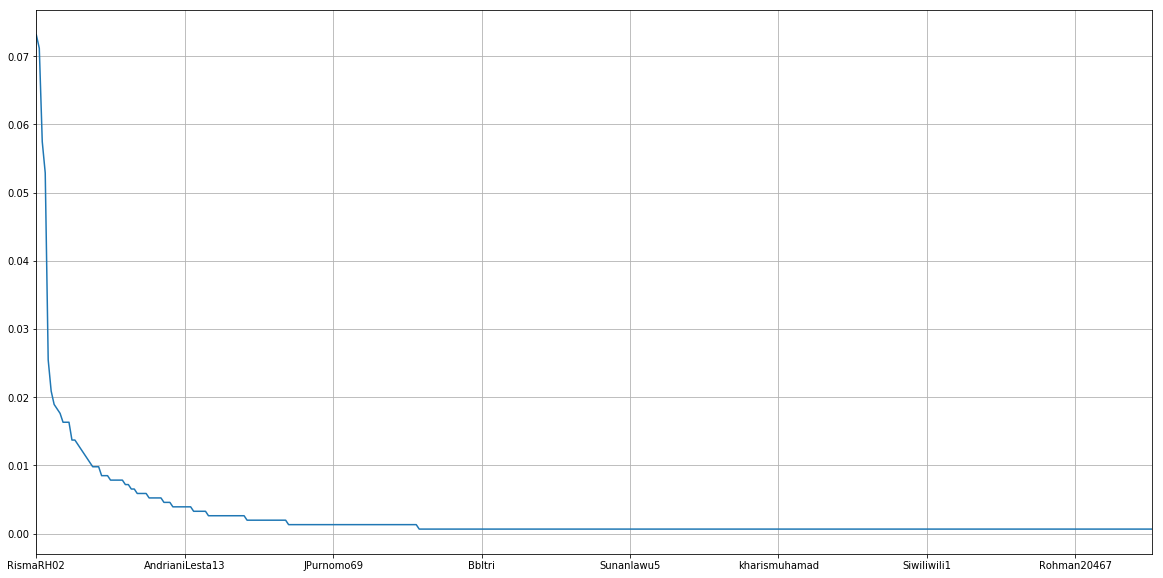

In [5]:
data.from_user.value_counts(normalize=True).plot(kind='line', grid=True, figsize=(20, 10))

In [6]:
data = data.drop_duplicates('text')

In [7]:
data = data[~data['text'].isnull()]
print(data.shape)

(1206, 18)


In [8]:
data = data[(data.text.map(len) > 140) & (data.text.map(len) <= 300)]
data.reset_index(inplace=True, drop=True)
print(data.shape)

(239, 18)


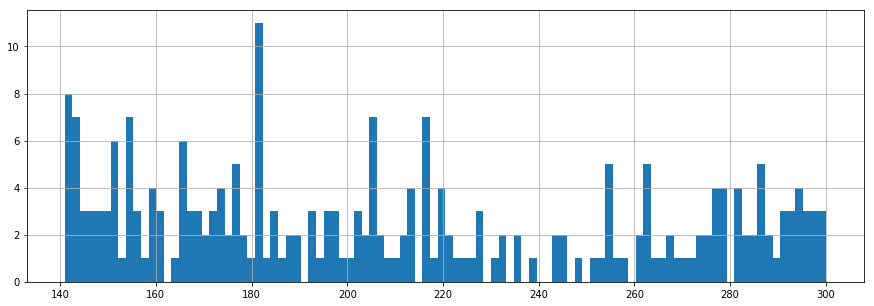

In [9]:
data.text.map(len).hist(figsize=(15, 5), bins=100)

In [10]:
data = data.sample(200, random_state=42)
data.reset_index(inplace=True, drop=True)
data.head(10)

id_str       from_user  \
0  1162174022819274752   83_nurjamilah   
1  1162176481134403585       mgsgathan   
2  1162163370276974593      JPurnomo69   
3  1162161395552514048          UNS752   
4  1162161815331065856     NuroelHoeda   
5  1162154120142188545  DirhamsyahRyan   
6  1162150424306040833       RismaRH02   
7  1162164132629454848        M_G1LANG   
8  1162176284580913152      rizkikitri   
9  1162157795879161858    p4dr1_chozan   

                                                text  \
0  RT @Profeson9: Met pagi Parlemen SUSU &amp; KR...   
1  @_kuis_ Wajib min, dalam agama Islam semua dos...   
2  @EDitektif @MichelAdamAnyar Kemanusiaan berpih...   
3  Kembaliin semua berikut kekayaan alam Indonesi...   
4  @TofaGarisLurus @Twitter opo² an iki Pak...Kok...   
5  Lewati Makam Siti Khadijah\nHabib Hanif Baca Q...   
6  Utang Luar Negeri RI Naik 10,1 Persen - https:...   
7  @Profeson9 @Billy_Lagee @MichelAdamAnyar @Ryiz...   
8  @NKRI_RI @aiek_esthreem @Etam394gmailco1 @semu...   
9  Waaaww ,, \nMakin banyak kasbon aje ni nanti.\...   

                       created_at                 time  geo_coordinates  \
0  Fri Aug 16 01:27:33 +0000 2019  16/08/2019 02:27:33              NaN   
1  Fri Aug 16 01:37:19 +0000 2019  16/08/2019 02:37:19              NaN   
2  Fri Aug 16 00:45:14 +0000 2019  16/08/2019 01:45:14              NaN   
3  Fri Aug 16 00:37:23 +0000 2019  16/08/2019 01:37:23              NaN   
4  Fri Aug 16 00:39:03 +0000 2019  16/08/2019 01:39:03              NaN   
5  Fri Aug 16 00:08:28 +0000 2019  16/08/2019 01:08:28              NaN   
6  Thu Aug 15 23:53:47 +0000 2019  16/08/2019 00:53:47              NaN   
7  Fri Aug 16 00:48:15 +0000 2019  16/08/2019 01:48:15              NaN   
8  Fri Aug 16 01:36:33 +0000 2019  16/08/2019 02:36:33              NaN   
9  Fri Aug 16 00:23:05 +0000 2019  16/08/2019 01:23:05              NaN   

   user_lang  in_reply_to_user_id_str in_reply_to_screen_name  \
0        NaN                      NaN                     NaN   
1        NaN             1.152190e+18                  _kuis_   
2        NaN             1.029300e+18               EDitektif   
3        NaN                      NaN                     NaN   
4        NaN             1.136101e+18          TofaGarisLurus   
5        NaN                      NaN                     NaN   
6        NaN                      NaN                     NaN   
7        NaN             1.142292e+18               Profeson9   
8        NaN             1.156949e+18                 NKRI_RI   
9        NaN                      NaN                     NaN   

      from_user_id_str  in_reply_to_status_id_str  \
0           1687359906                        NaN   
1            896907643               1.162176e+18   
2   951265436728836096               1.162150e+18   
3  1134453703769874432                        NaN   
4   953905561141047296               1.162027e+18   
5  1138378582361722880                        NaN   
6  1142242143198568448                        NaN   
7           4671595033               1.162140e+18   
8   828422194711580672               1.162145e+18   
9  1028645617629724674                        NaN   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/android" ...   
3  <a href="http://twitter.com/download/android" ...   
4  <a href="http://twitter.com/download/android" ...   
5  <a href="https://mobile.twitter.com" rel="nofo...   
6  <a href="http://twitter.com/download/android" ...   
7  <a href="http://twitter.com/download/android" ...   
8  <a href="https://mobile.twitter.com" rel="nofo...   
9  <a href="http://twitter.com/download/android" ...   

                                   profile_image_url  user_followers_count  \
0  http://pbs.twimg.com/profile_images/1162133110...                1524.0   
1  http://pbs.twimg.com/profile_image

In [11]:
stop_words = []
f = open('./data/stopword.txt', 'r')
for l in f.readlines():
    stop_words.append(l.replace('\n', ''))
additional_stop_words = ['t', 'will']
stop_words += additional_stop_words
print(len(stop_words))

760


In [50]:
import functools
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

In [51]:
def tokenizer(text):
    text = clean_text(text)    
    tokens = [word_tokenize(sent) for sent in sent_tokenize(text)]
    tokens = list(functools.reduce(lambda x,y: x+y, tokens))
    tokens = list(filter(lambda token: token not in (stop_words + list(punctuation)) , tokens))
    return tokens

In [52]:
data['text'] = data['text'].map(lambda d: str(d))
data['tokens'] = data['text'].progress_map(lambda d: tokenizer(d))

In [53]:
for descripition, tokens in zip(data['text'].head(5), data['tokens'].head(5)):
    print(':', descripition)
    print('tokens:', tokens)
    print() 

: RT @Profeson9: Met pagi Parlemen SUSU &amp; KR
@Billy_Lagee
@MichelAdamAnyar
@Profeson9
@RyizondR
@RissaRR02
@RismaRichi
@Bawel_Girl
@M_G1LANG
@elamawar1
@ParicaraNyai
@DuchessOfPanda
@amira_swandary
@NurmajadVozdh
@BidadariOposisi
@AmaZanea00
@Shyin90
@PutriAi15784229
👇
#UtangBanyakHarga2Melonjak
tokens: ['rt', 'profeson', 'met', 'pagi', 'parlemen', 'susu', 'amp', 'kr', 'billylagee', 'micheladamanyar', 'profeson', 'ryizondr', 'rissarr', 'rismarichi', 'bawelgirl', 'mglang', 'elamawar', 'paricaranyai', 'duchessofpanda', 'amiraswandary', 'nurmajadvozdh', 'bidadarioposisi', 'amazanea', 'shyin', 'putriai', 'utangbanyakhargamelonjak']

: @_kuis_ Wajib min, dalam agama Islam semua dosa akan di ampuni ketika meninggal syahid tapi tidak dengan hutang...  #UtangBanyakHarga2Melonjak
tokens: ['kuis', 'wajib', 'min', 'agama', 'islam', 'dosa', 'ampuni', 'meninggal', 'syahid', 'hutang', 'utangbanyakhargamelonjak']

: @EDitektif @MichelAdamAnyar Kemanusiaan berpihak pd kebenaran , kedzoliman mengha

In [16]:
def keywords(text):
    tokens = data[data['text'] == text]['tokens']
    alltokens = []
    for token_list in tokens:
        alltokens += token_list
    counter = Counter(alltokens)
    return counter.most_common(10)

In [17]:
data['text'] = data['text'].map(lambda d: str(d))
data['tokens'] = data['text'].progress_map(lambda d: tokenizer(d))

In [18]:
for text in set(data['text']):
    print('text :', text)
    print('top 10 keywords:', keywords(text))
    print('---') 

text : TAGAR kita pagi ini mulai jam 06:00:
#UtangBanyakHarga2Melonjak 

Yang ingin ikut viralkan TAGAR ini, 

1. Sila RT, like, reply tuit2 yang ada TAGAR
#UtangBanyakHarga2Melonjak 

2. Tambahkan TAGAR
#UtangBanyakHarga2Melonjak 
di tuitan masing2.

Jangan campur TAGAR lain
top 10 keywords: [('tagar', 5), ('utangbanyakhargamelonjak', 3), ('pagi', 1), ('jam', 1), ('viralkan', 1), ('sila', 1), ('rt', 1), ('like', 1), ('reply', 1), ('tuit', 1)]
---
text : RT @DirhamsyahRyan: Ketika sang suami menyindir sang istri :D, entah apa yang akan terjadi setelahnya. Ternyata benar, memang mencari kambing hitam itu adalah cara yang paling mudah, efektif dan efisien.

#UtangBanyakHarga2Melonjak 
#UtangBanyakHarga2Melonjak https://t.co/2RWn5k0ySg
top 10 keywords: [('sang', 2), ('utangbanyakhargamelonjak', 2), ('rt', 1), ('dirhamsyahryan', 1), ('suami', 1), ('menyindir', 1), ('istri', 1), ('d', 1), ('setelahnya', 1), ('mencari', 1)]
---
text : RT @Affan_indra: Capek-capek ngerayu @RismaRH02 eh malah 

In [54]:
data['text'] = data['text'].map(lambda d: str(d))
data['tokens'] = data['text'].progress_map(lambda d: tokenizer(d))

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, analyzer='word', ngram_range=(1, 2), stop_words='english')
vz = vectorizer.fit_transform(list(data['tokens'].map(lambda tokens: ' '.join(tokens))))
vz.shape

(200, 177)

In [56]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

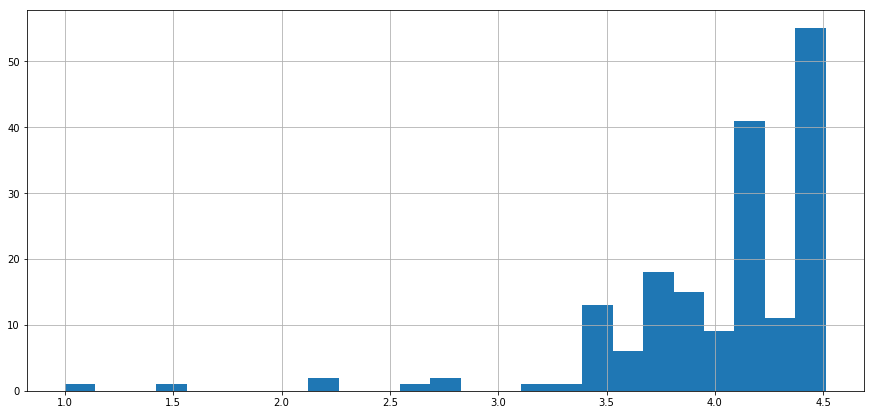

In [57]:
tfidf.tfidf.hist(bins=25, figsize=(15,7))

In [58]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
def plot_word_cloud(terms):
    text = terms.index
    text = ' '.join(list(text))
    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure(figsize=(25, 25))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

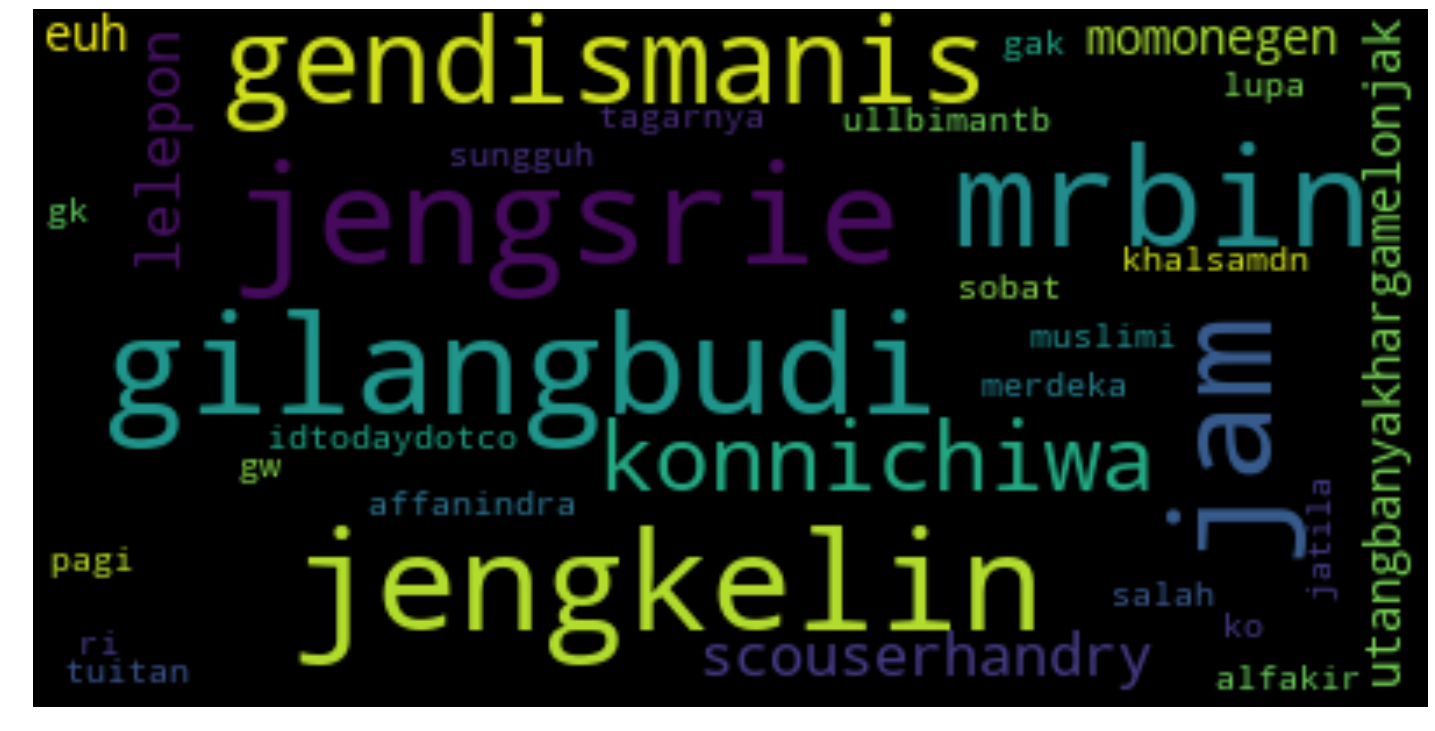

In [59]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=False).head(40))

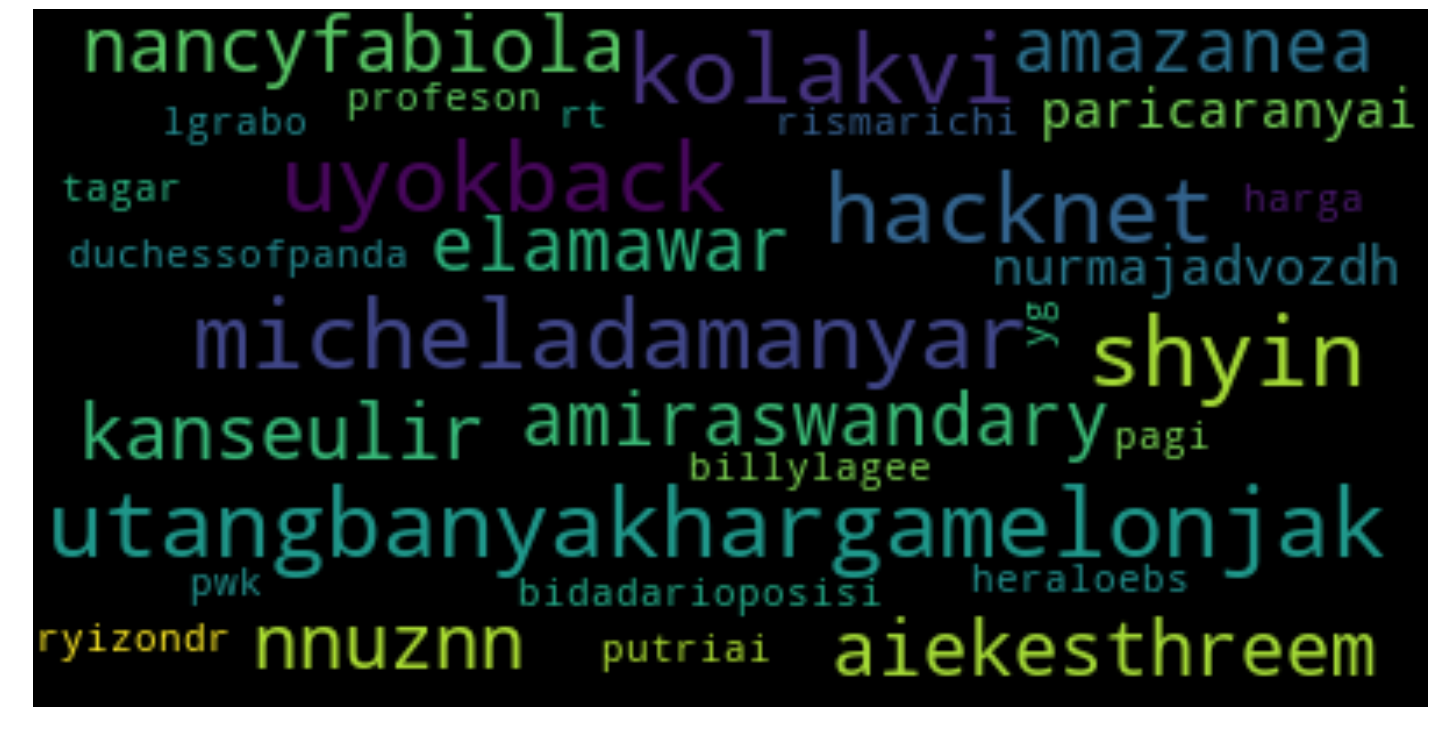

In [62]:
plot_word_cloud(tfidf.sort_values(by=['tfidf'], ascending=True).head(40))